In [25]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt 
import scipy.stats as scs
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

In [26]:
df = pd.read_csv('data/Train.csv')
dftest = pd.read_csv('data/test.csv')

/home/tomas/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null object
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                       4

/home/tomas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


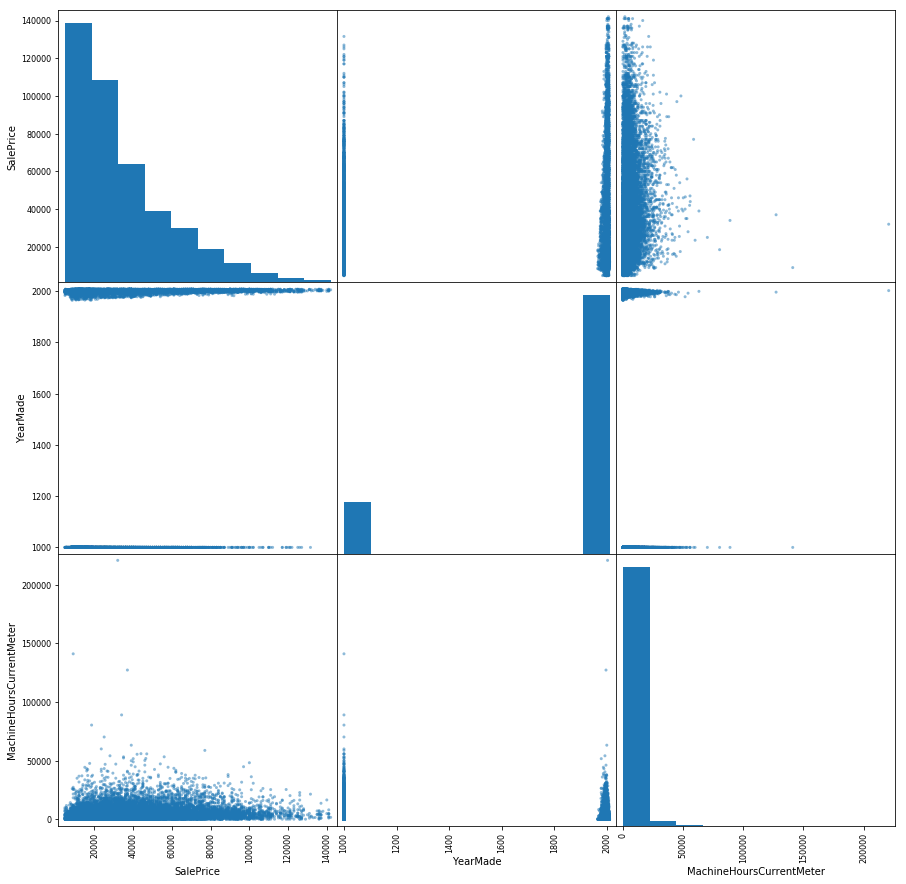

In [27]:
dfbasic = df[['SalePrice','YearMade','MachineHoursCurrentMeter','']][:20000]

pd.scatter_matrix(dfbasic, figsize=(15,15))
plt.show()

In [37]:
X = df[['YearMade']].values
X_const = add_constant(X, prepend=True)
y = df['SalePrice'].values

linear_model = sm.OLS(y, X_const).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                 1.006e+04
Date:                Fri, 17 Nov 2017   Prob (F-statistic):               0.00
Time:                        11:36:50   Log-Likelihood:            -4.5934e+06
No. Observations:              401125   AIC:                         9.187e+06
Df Residuals:                  401123   BIC:                         9.187e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7641.9749    236.565     32.304      0.000    7178.315    8105.634
x1            12.3517      0.123    100.324      0.000      12.110      12.593
==============================================================================
Omnibus:                   104356.287   Durbin-Watson:                   0.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           232509.506
Skew:                           1.504   Prob(JB):                         0.00
Kurtosis:                       5.206   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
X = df[['YearMade']].values
y = df['SalePrice'].values

mod = LinearRegression().fit(X,y)
X_test = dftest['YearMade'].values

In [55]:
ypredict = mod.predict(X_test.reshape(-1,1))

In [53]:
X_test

array([1000, 2006, 2000, ..., 2005, 2006, 2006])

In [48]:
dftest.describe()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,1.157300e+04,1.157300e+04,11573.000000,11573.000000,11573.000000,11573.000000,4739.000000
mean,5.180809e+06,1.651495e+06,8940.135833,152.622656,7.547481,1895.331807,5482.141380
std,1.619443e+06,6.522485e+05,7807.393696,14.872064,22.307077,305.481901,6391.097182
min,1.222837e+06,1.500000e+02,28.000000,121.000000,0.000000,1000.000000,0.000000
25%,4.312616e+06,1.067304e+06,3362.000000,149.000000,1.000000,1993.000000,1268.000000
50%,6.264848e+06,1.862151e+06,4763.000000,149.000000,1.000000,2001.000000,3786.000000
75%,6.286342e+06,2.270530e+06,14303.000000,172.000000,3.000000,2005.000000,7793.000000
max,6.333349e+06,2.485252e+06,37197.000000,173.000000,99.000000,2014.000000,89200.000000


In [49]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 52 columns):
SalesID                     11573 non-null int64
MachineID                   11573 non-null int64
ModelID                     11573 non-null int64
datasource                  11573 non-null int64
auctioneerID                11573 non-null int64
YearMade                    11573 non-null int64
MachineHoursCurrentMeter    4739 non-null float64
UsageBand                   4031 non-null object
saledate                    11573 non-null object
fiModelDesc                 11573 non-null object
fiBaseModel                 11573 non-null object
fiSecondaryDesc             8037 non-null object
fiModelSeries               1759 non-null object
fiModelDescriptor           2897 non-null object
ProductSize                 5743 non-null object
fiProductClassDesc          11573 non-null object
state                       11573 non-null object
ProductGroup                11573 non-null object
Pr

In [75]:
answer = pd.DataFrame({'SalePrice' : ypredict},index=dftest['SalesID'])

In [80]:
answer.to_csv('team1benchmark.csv',sep=',')

In [94]:
X_train = df[['YearMade']].values
y_train = df['SalePrice'].values
X_test = dftest['YearMade'].values


pipe = make_pipeline(preprocessing.StandardScaler(), Lasso(alpha=0.5))
scores = cross_validation.cross_val_score(pipe, X_train, y_train, cv=5)

scores, scores.mean()

/home/tomas/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tomas/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tomas/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tomas/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tomas/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data w

(array([-0.00270881, -0.12954242, -0.07537025,  0.01933988,  0.02633986]),
 -0.032388346151432781)

In [132]:
df_state=pd.get_dummies(df['state'],drop_first=True)
dfm = df[['YearMade']].join(df_state)
X_train = dfm.values
y_train = df['SalePrice'].values
X_test = dftest[['YearMade']].values

pipe = make_pipeline(preprocessing.StandardScaler(), Lasso(alpha=0.5))
# scores = cross_validation.cross_val_score(pipe, X_train, y_train, cv=5)

pipe.fit(X_train, y_train)
pipe.predict(X_test.reshape(-1,1))

/home/tomas/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


ValueError: non-broadcastable output operand with shape (11573,1) doesn't match the broadcast shape (11573,53)

In [107]:
def num_null_check(df, cols):

    #result = []

    for c in cols:

        null_cnt = sum(pd.isna(df[c]))==0

        if null_cnt==0:

            pass

        else:

            print(c, null_cnt)

In [110]:
num_null_check(df,['SalesID','MachineID','ModelID','datasource','auctioneerID','YearMade','MachineHoursCurrentMeter'])

AttributeError: module 'pandas' has no attribute 'isna'

In [147]:
df.MachineHoursCurrentMeter.value_counts()

0.0         73126
2000.0        122
1000.0        116
1500.0        101
500.0          97
800.0          90
1200.0         87
2500.0         83
1400.0         83
1700.0         82
32767.0        81
3000.0         76
1300.0         68
400.0          67
2600.0         65
1800.0         64
1600.0         64
1100.0         63
2400.0         61
900.0          60
2300.0         59
1900.0         59
2200.0         58
200.0          57
2100.0         56
2800.0         55
4000.0         51
600.0          50
700.0          48
100.0          48
            ...  
69850.0         1
9070.0          1
11829.0         1
11917.0         1
14548.0         1
23838.0         1
11922.0         1
11923.0         1
16288.0         1
9064.0          1
27548.0         1
9966.0          1
11932.0         1
32755.0         1
15420.0         1
6172.0          1
14552.0         1
7640.0          1
14498.0         1
9066.0          1
23890.0         1
12766.0         1
27542.0         1
11949.0         1
23899.0   

In [143]:
X_train = df[['YearMade']].values
y_train = df['SalePrice'].values
X_test = dftest[['YearMade']].values

reg = Lasso(alpha=0.5)
# scores = cross_validation.cross_val_score(pipe, X_train, y_train, cv=5)

reg.fit(X_train, y_train)
reg.predict(X_test)

array([ 19993.63891716,  32419.40171666,  32345.29179937, ...,
        32407.05006378,  32419.40171666,  32419.40171666])

In [148]:
df.MachineHoursCurrentMeter.value_counts().sort_index()

0.0          73126
2.0             18
3.0             21
4.0             35
5.0             44
6.0             20
7.0             12
8.0             18
9.0             13
10.0            33
11.0            12
12.0            12
13.0            20
14.0             9
15.0            17
16.0             8
17.0             7
18.0             8
19.0             6
20.0            10
21.0             5
22.0             7
23.0            10
24.0            41
25.0             9
26.0             8
27.0             9
28.0             8
29.0             7
30.0             8
             ...  
861300.0         1
886200.0         1
892700.0         1
906100.0         1
922100.0         1
932000.0         1
934400.0         1
945300.0         1
968400.0         1
974400.0         1
991000.0         1
1064900.0        1
1098000.0        1
1112100.0        1
1148500.0        1
1189500.0        1
1194900.0        1
1203000.0        1
1209500.0        1
1228200.0        1
1282700.0        1
1429800.0   

In [28]:
df['saledate'] = pd.to_datetime(df.saledate)

df['saleyear'] = df['saledate'].dt.year

df['age'] = df['saleyear']-df['YearMade']


dftest['saledate'] = pd.to_datetime(dftest.saledate)

dftest['saleyear'] = dftest['saledate'].dt.year

dftest['age'] = dftest['saleyear']-dftest['YearMade']

In [66]:
X_train = df[['age','MachineHoursCurrentMeter','MachineID','ModelID']].join(train.iloc[:,53:]).join(trainu.iloc[:,53:56])
y_train = df['SalePrice'].values
X_test = dftest[['age','MachineHoursCurrentMeter','MachineID','ModelID']].join(test.iloc[:,53:]).join(testu.iloc[:,53:56])

pipe = make_pipeline(preprocessing.StandardScaler(), Lasso(alpha=100))
# scores = cross_validation.cross_val_score(pipe, X_train, y_train, cv=5)

pipe.fit(X_train, y_train)
ypredict = pipe.predict(X_test)

In [67]:
answer = pd.DataFrame({'SalePrice' : ypredict},index=dftest['SalesID'])
answer.to_csv('team1benchmark8.csv',sep=',')

In [168]:
dftest.describe()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleyear,age
count,1.157300e+04,1.157300e+04,11573.000000,11573.000000,11573.000000,11573.000000,4739.000000,11573.0,11573.000000
mean,5.180809e+06,1.651495e+06,8940.135833,152.622656,7.547481,1895.331807,5482.141380,2012.0,116.668193
std,1.619443e+06,6.522485e+05,7807.393696,14.872064,22.307077,305.481901,6391.097182,0.0,305.481901
min,1.222837e+06,1.500000e+02,28.000000,121.000000,0.000000,1000.000000,0.000000,2012.0,-2.000000
25%,4.312616e+06,1.067304e+06,3362.000000,149.000000,1.000000,1993.000000,1268.000000,2012.0,7.000000
50%,6.264848e+06,1.862151e+06,4763.000000,149.000000,1.000000,2001.000000,3786.000000,2012.0,11.000000
75%,6.286342e+06,2.270530e+06,14303.000000,172.000000,3.000000,2005.000000,7793.000000,2012.0,19.000000
max,6.333349e+06,2.485252e+06,37197.000000,173.000000,99.000000,2014.000000,89200.000000,2012.0,1012.000000


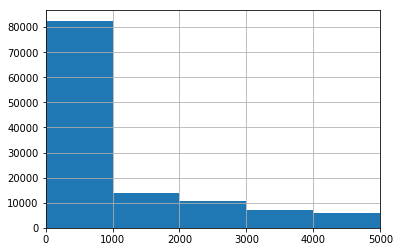

In [196]:
df.MachineHoursCurrentMeter.hist(bins=100)
plt.xlim(0,5000)
plt.show()

In [27]:
df.loc[df['MachineHoursCurrentMeter']>100000,'MachineHoursCurrentMeter'] = 100000
dftest.loc[dftest['MachineHoursCurrentMeter']>100000,'MachineHoursCurrentMeter'] = 100000
df.loc[pd.isna(df.MachineHoursCurrentMeter),'MachineHoursCurrentMeter']=1831
dftest.loc[pd.isna(dftest.MachineHoursCurrentMeter),'MachineHoursCurrentMeter']=1831
df.loc[pd.isna(df.auctioneerID),'auctioneerID']=3
dftest.loc[pd.isna(dftest.auctioneerID),'auctioneerID']=3


In [198]:
df.fillna(method='ffill')

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,age
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2006,2
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2004,8
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2004,3
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2011,10
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2009,2
5,1139255,26500,1001274,4605,121,3.0,2004,508.0,Low,2008-12-18,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2008,4
6,1139256,21000,772701,1937,121,3.0,1993,11540.0,High,2004-08-26,...,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,Standard,Conventional,2004,11
7,1139261,27000,902002,3539,121,3.0,2001,4883.0,High,2005-11-17,...,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,Standard,Conventional,2005,4
8,1139272,21500,1036251,36003,121,3.0,2008,302.0,Low,2009-08-27,...,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,Standard,Conventional,2009,1
9,1139275,65000,1016474,3883,121,3.0,1000,20700.0,Medium,2007-08-09,...,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,Standard,Conventional,2007,1007


In [43]:
train = pd.get_dummies(df, columns=['state'])
test = pd.get_dummies(dftest, columns=['state'])

train, test = train.align(test, join='inner', axis=1)

In [56]:
train.iloc[:,53:]

,state_Alabama,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,state_Idaho,...,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
trainu = pd.get_dummies(df, columns=['UsageBand'])
testu = pd.get_dummies(dftest, columns=['UsageBand'])

trainu, testu = trainu.align(testu, join='inner', axis=1)

In [65]:
trainu.iloc[:,53:56]

,UsageBand_High,UsageBand_Low,UsageBand_Medium
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,0,1
5,0,1,0
6,1,0,0
7,1,0,0
8,0,1,0
9,0,0,1


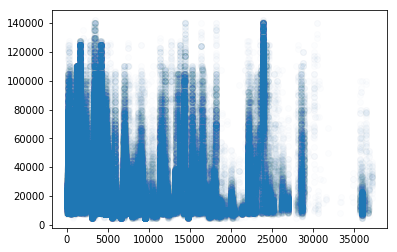

In [79]:
plt.scatter(df.ModelID,df.SalePrice, alpha=0.01)
plt.show()